## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isnull().any()
#Везде False, значит пропущенных нет. Категориальных тоже

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

s = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,stratify=y,random_state=s)

#stratify необходимо использовать, как как без него случайная выборка может быть неудачной, может привести к переобучению или плохой работе модели

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_tr=X_train[['alcohol','magnesium']]
X_te=X_test[['alcohol','magnesium']]

sc=StandardScaler()
X_sc=sc.fit_transform(X_tr)
X_sc_te=sc.transform(X_te)

n=[1,3,5,10,15,25]
print("NN\tTrain\tTest")
for i in n:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_sc,y_train)
  test_knn=knn.score(X_sc_te,y_test)
  train_knn=knn.score(X_sc,y_train)

  print("{0:2d}\t{1:.2f}\t{2:.2f}".format(i,train_knn,test_knn))

NN	Train	Test
 1	1.00	0.56
 3	0.80	0.63
 5	0.78	0.63
10	0.75	0.65
15	0.72	0.63
25	0.69	0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

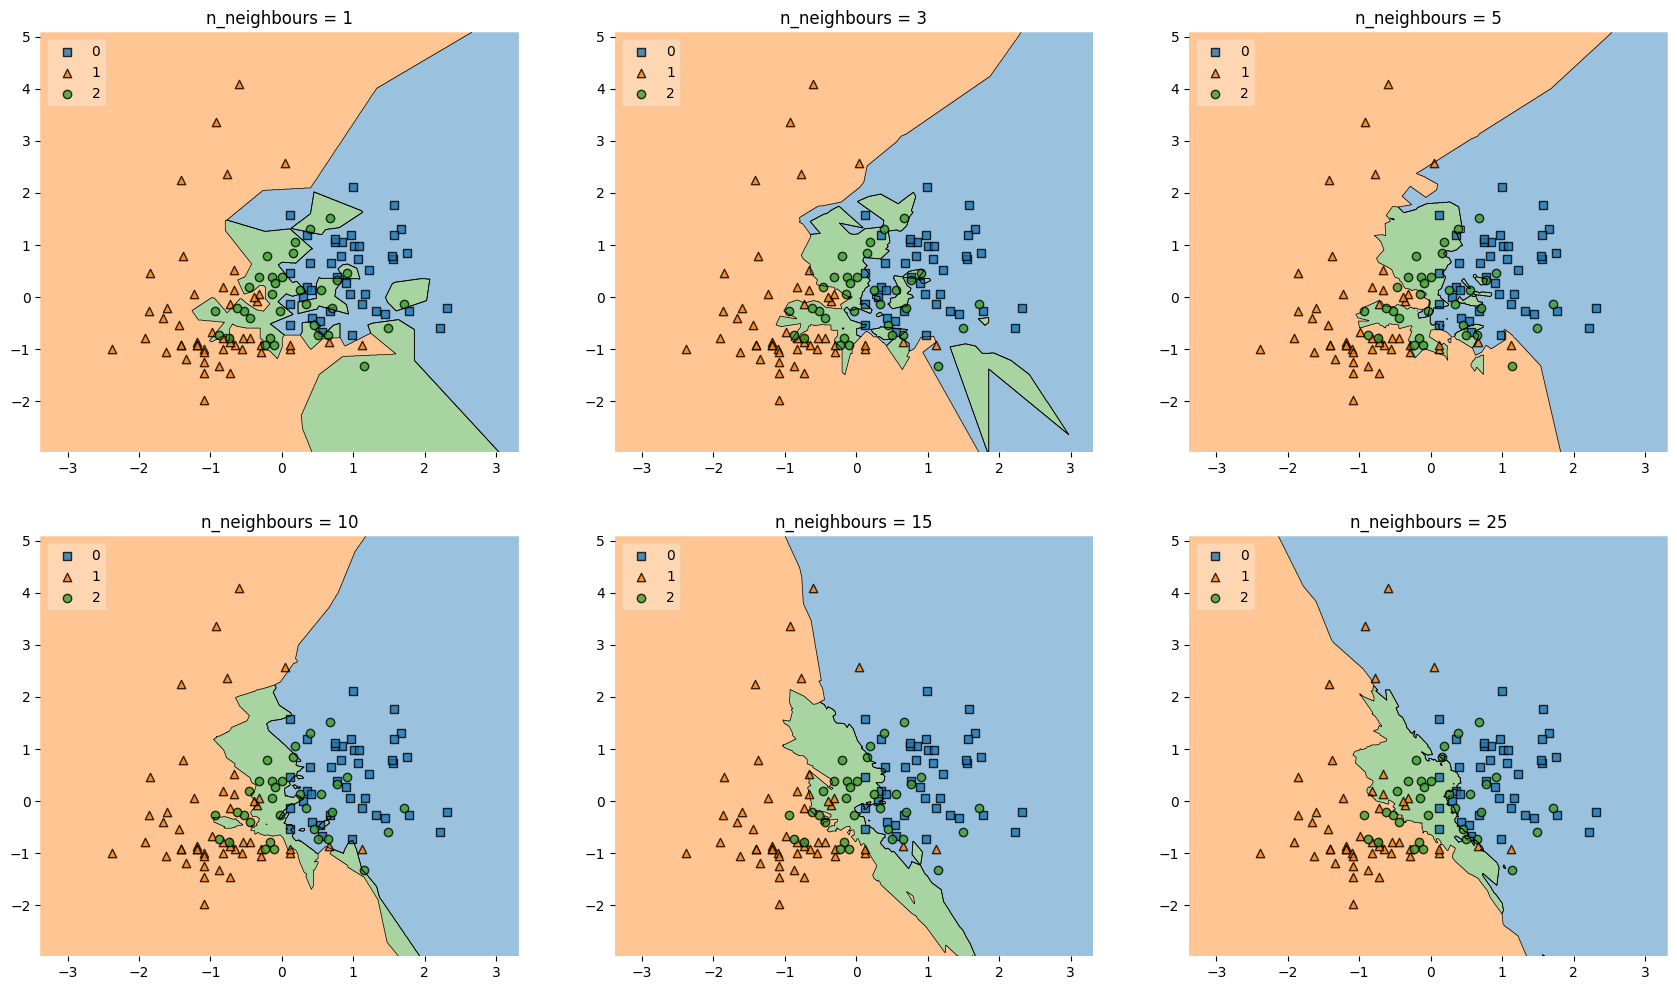

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

fig, axes = plt.subplots(2, 3, figsize=(21,12))
ax=axes.flat

for i in range(6):
  knn = KNeighborsClassifier(n_neighbors=n[i])
  knn.fit(X_sc,y_train)
  plot_decision_regions(X_sc,y_train,clf=knn,legend=2,ax=ax[i])
  ax[i].set_title('n_neighbours = '+str(n[i]))

plt.show()



**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [ ]:
#Если проанализировать значения, полученные в 1.3, то наилучшими вариантами будут 5 и 10. При меньшем количестве соседей результаты на обучающей выборке сильно выше, чем на тестовой, что говорит о переобучении
#И наоборот, при большем количестве соседей начинают ухудшаться показатели на обучающей выборке

#Анализируя 1.5 можно заметить, что при маленьком количестве соседей получается слишком много "шума", неоднородность полей (больше всего это заметно на зелёном участке повехности). При больших значениях k получается слишком большая погрешность,
#большая часть элементов отнесены не к своему классу.

#То есть нашими лучшими вариантами в обоих результатах являются 5 и 10. Однако, так как лучше выбирать нечетное количество соседей, чтобы не было спорных ситуаций между двумя классами с одинаковым количеством элементов, то наилучшим выбором будет k=5

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

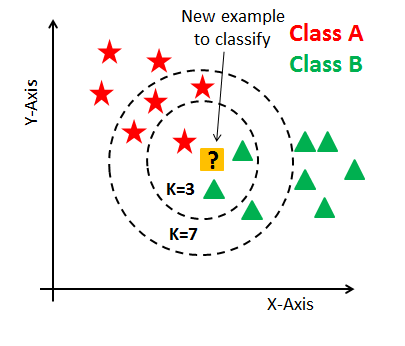

In [58]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      pass

    def predict(self, X):
      res=[]
      for i in X:
        distance = []
        for j in range(len(self.X_train)):
          distance.append((self.count_distance(i,self.X_train[j]),self.y_train[j]))
        distance.sort()
        knearest=[]
        for j in range(self.k):
          knearest.append(distance[j][1])
        res.append(Counter(knearest).most_common(1)[0][0])
      return np.array(res)
      pass

    def count_distance(self, x, y):
      return np.sqrt(np.sum(np.square(x-y)))
      pass

In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [59]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [15]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [16]:
data.isnull().any()

#все False, значит пропусков нет

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [17]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True) #этот столбец это просто индекс, так что убираем
data.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [18]:
matr = data.corr(numeric_only=True)
print(matr)

#Как можно заметить по матрице, больше всего с ценой коррелируют вес (carat), а также размер (больше всего длина (x), далее ширина (y) и глубина(z))

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
data = pd.get_dummies(data,columns=['cut','color','clarity'])

data.head(3)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [20]:
y=data["price"]
X=data.drop('price',axis=1)

s = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=s)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
sc=StandardScaler()
X_sc=sc.fit_transform(X_train)
X_sc_te=sc.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_r = LinearRegression()
model = lin_r.fit(X_sc, y_train)

sqrd_error_train = mean_squared_error(y_train, lin_r.predict(X_sc))
sqrd_error_test = mean_squared_error(y_test, lin_r.predict(X_sc_te))

print("Cреднеквадратичная ошибка")
print("На тренировочной выборке: {0:.2f}\tНа тестовой выборке:{1:.2f}".format(sqrd_error_train,sqrd_error_test))

Cреднеквадратичная ошибка
На тренировочной выборке: 1290541.91	На тестовой выборке:1244765.44


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [23]:
coef = pd.DataFrame(data=model.coef_,index=X.columns)
coef

#Как можно заметить по таблице, наибольшая оценка коэффициентов у признака carat, после него стоит x. Остальные вещественные признаки сильно меньше них

,0
carat,5338.615671
depth,-90.173817
table,-60.332280
x,-1100.418850
y,-6.458917
z,-34.258945
cut_Fair,-125.711003
cut_Good,-41.395989
cut_Ideal,51.992206
cut_Premium,16.464741


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [24]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(X_sc, y_train)
coef_lasso = pd.DataFrame(data=lasso.coef_,index=X.columns)
coef_lasso

#При данной регрессии довольно существенно поменялись коэффициенты. Некоторые стали 0, а признак с большой оценкой коэффициентов (x) уменьшился почти в два раза.

,0
carat,4872.156396
depth,-57.093610
table,-47.684857
x,-652.157442
y,-0.000000
z,-43.265361
cut_Fair,-126.504261
cut_Good,-42.809322
cut_Ideal,41.695815
cut_Premium,0.000000


In [25]:
ridge = Ridge(alpha=10)
ridge.fit(X_sc, y_train)
coef_ridge = pd.DataFrame(data=ridge.coef_,index=X.columns)
coef_ridge

#При этой регрессии значения коэффициентов почти не изменились

,0
carat,5301.289062
depth,-87.639805
table,-60.123686
x,-1057.228888
y,-9.605149
z,-38.071544
cut_Fair,-125.880000
cut_Good,-41.480355
cut_Ideal,51.969036
cut_Premium,16.449545


In [26]:
#Проверим на мультиколлинеарность. Если она есть, определитель матрицы корреляции близок к нулю
print(np.linalg.det(matr))

#Как можно заметить, значение близко к нулю, а значит присутствует сильная мультикорреляция

1.2106618286179962e-05


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


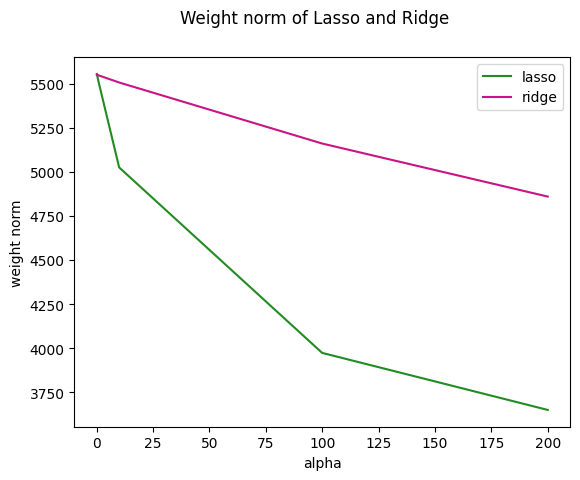

In [27]:
alpha = [0.1, 1, 10, 100, 200]
lasso_res=[]
ridge_res=[]

for i in alpha:
  lasso = Lasso(alpha=i)
  lasso.fit(X_sc, y_train)
  lasso_res.append(np.linalg.norm(lasso.coef_))
  ridge = Ridge(alpha=i)
  ridge.fit(X_sc, y_train)
  ridge_res.append(np.linalg.norm(ridge.coef_))

plt.plot(alpha,lasso_res,color='forestgreen', label='lasso')
plt.plot(alpha,ridge_res,color='mediumvioletred', label='ridge')
plt.xlabel("alpha")
plt.ylabel("weight norm")
plt.suptitle("Weight norm of Lasso and Ridge")
plt.legend()
plt.show()

#Как можно заметить по графику и по предыдущим заданиям, метод Lasso агрессивнее убирает веса. Этот метод часто используют, так как он часто
#зануляет большие коэффициенты. Эта регрессия специально адаптирована для данных с мультиколлинеарностью. Кроме того, этот метод упрощает данные

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [36]:
from sklearn.linear_model import LassoCV

cv = LassoCV(alphas=alpha, cv=5)
cv.fit(X_sc,y_train)

mse = cv.mse_path_.mean(axis=1)
print("Значение alpha с наибольшим качеством: {0:.1f}".format(cv.alphas_[mse.argmin()]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499002729.7686577, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


Значение alpha с наибольшим качеством: 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [38]:
lasso_2 = Lasso(alpha=cv.alphas_[mse.argmin()])
lasso_2.fit(X_sc,y_train)

coef_lasso=pd.DataFrame(data=lasso_2.coef_, index=X_train.columns)
coef_lasso

,0
carat,5292.355926
depth,-86.839987
table,-59.035308
x,-1057.146202
y,-4.229951
z,-35.456798
cut_Fair,-131.510814
cut_Good,-51.211156
cut_Ideal,34.465779
cut_Premium,0.000000


In [56]:
less_inf = pd.DataFrame(data=coef_lasso.reindex(coef_lasso[0].abs().sort_values().index))
less_inf

#Отсортируем наши индексы от наименее информативных к наиболее информативным

#Можно заметить, что в нашем случае наименее информативными были определенные виды огранки, качества и цвета. При этом, огранка в целом имеет малый вес, также как и ширина с высотой
#Наиболее информативными являются карат, длина и разные виды качества самого камня

#Вес, логично, самый основной показатель, так как обычно он больше всего показывает дороговизму. Длина больше отвечает за примерный размер, а качество за прозрачность камня.
#За большую цену люди предпочтут камень с большим весом, лучшим качеством и в целом побольше по размеру (по возможности).

,0
clarity_VS2,-0.000000
color_G,-0.000000
cut_Premium,0.000000
y,-4.229951
cut_Very Good,-12.731587
cut_Ideal,34.465779
z,-35.456798
cut_Good,-51.211156
table,-59.035308
color_F,85.245889


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [57]:
y_lasso=lasso_2.predict(X_sc_te)
mse_lasso = mean_squared_error(y_test, y_lasso)
print("Cреднеквадратичная ошибка")
print("Линейная: {0:.2f}\tLasso: {1:.2f}".format(sqrd_error_test,mse_lasso))

#Значения почти одинаковые, линейная оказалась немного лучше. Возможно это связано с тем, что многие признаки были важны для результата, поэтому даже при регрессии результат особо не изменился.
#Кроме того, возможно из-за этого Lasso и показал результат немного хуже, так как снизил значения коэффициентов


Cреднеквадратичная ошибка
Линейная: 1244765.44	Lasso: 1244864.74
